In [76]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from numpy import pi, sin, cos
%matplotlib notebook

# Descent Algorithms
$$
    x^{k+1} = x^k - \alpha D^k \nabla f(x^k)
$$

Where $D^k \in \mathbb R^{n,n}$

## Steepest Descent
$D^k = I_{nxn}$

In [140]:
def grad_desc(x0, grad, steps=100, alpha=0.1):
    """
    Naïve implementation of gradient descent: fixing
    on iterations, not on error
    """
    path = [x0]
    xk = x0.copy()
    for step in range(steps):
        xk -= alpha * grad(*xk)
        path.append(xk.copy())
    
    return np.array(path)

<IPython.core.display.Javascript object>


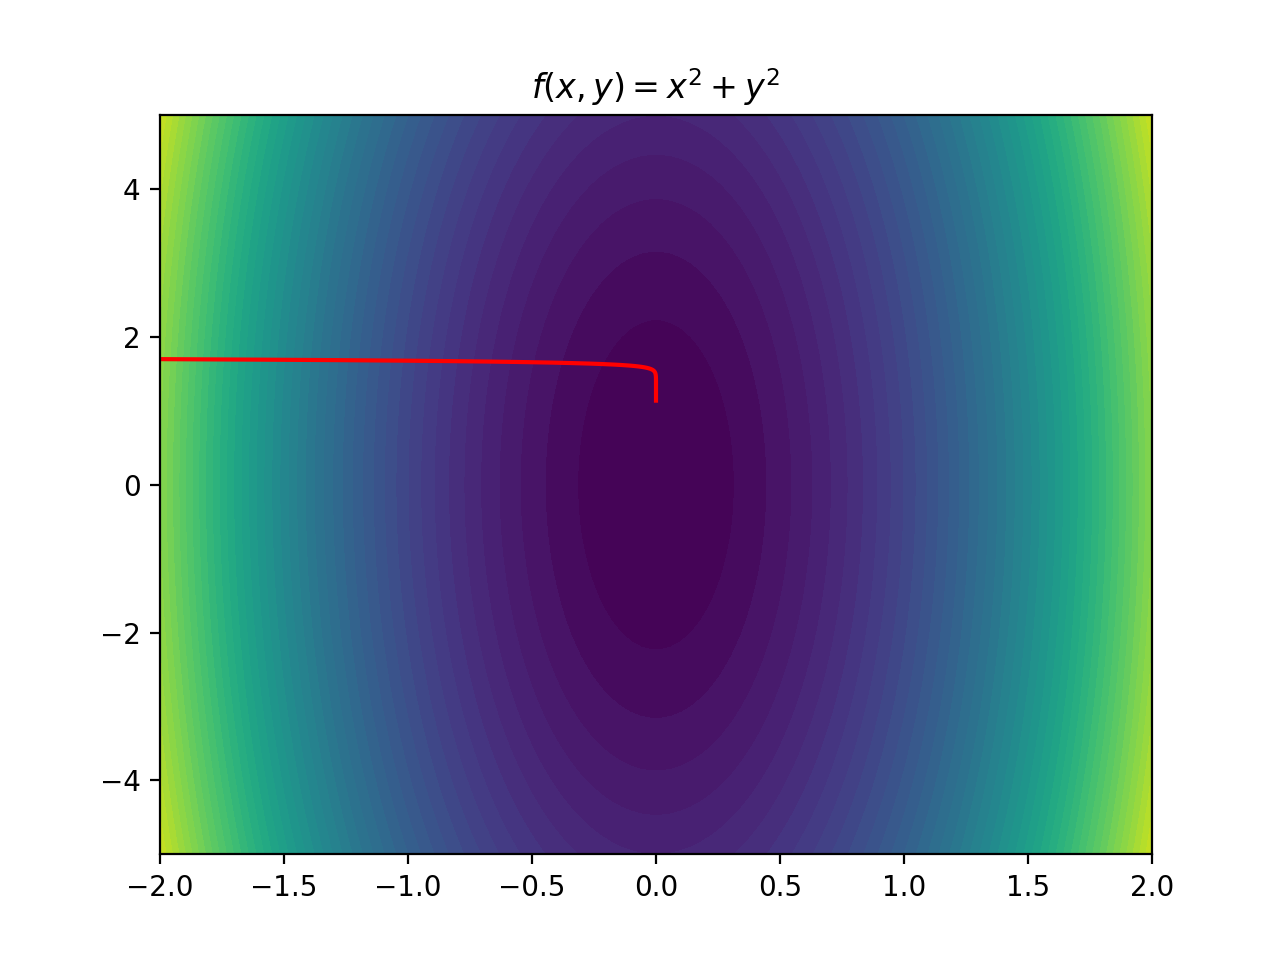

In [142]:
# x, y values to plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

#f(x,y) = x^2 + y^2 / 50 => D(f) = (2x, y/50)
f1 = lambda x, y: x**2 + y**2 / 50
f1_grad = lambda x, y: np.array([2 * x, y / 25])
f1_path = grad_desc(np.array([-2, 1.7]), f1_grad)

cs = plt.contourf(x, y, f1(x, y), levels=np.arange(0, 5, 0.1))
plt.plot(f1_path[:,0], f1_path[:,1], c="red")
plt.title(r"$f(x,y) = x^2 + y^2$")

<IPython.core.display.Javascript object>


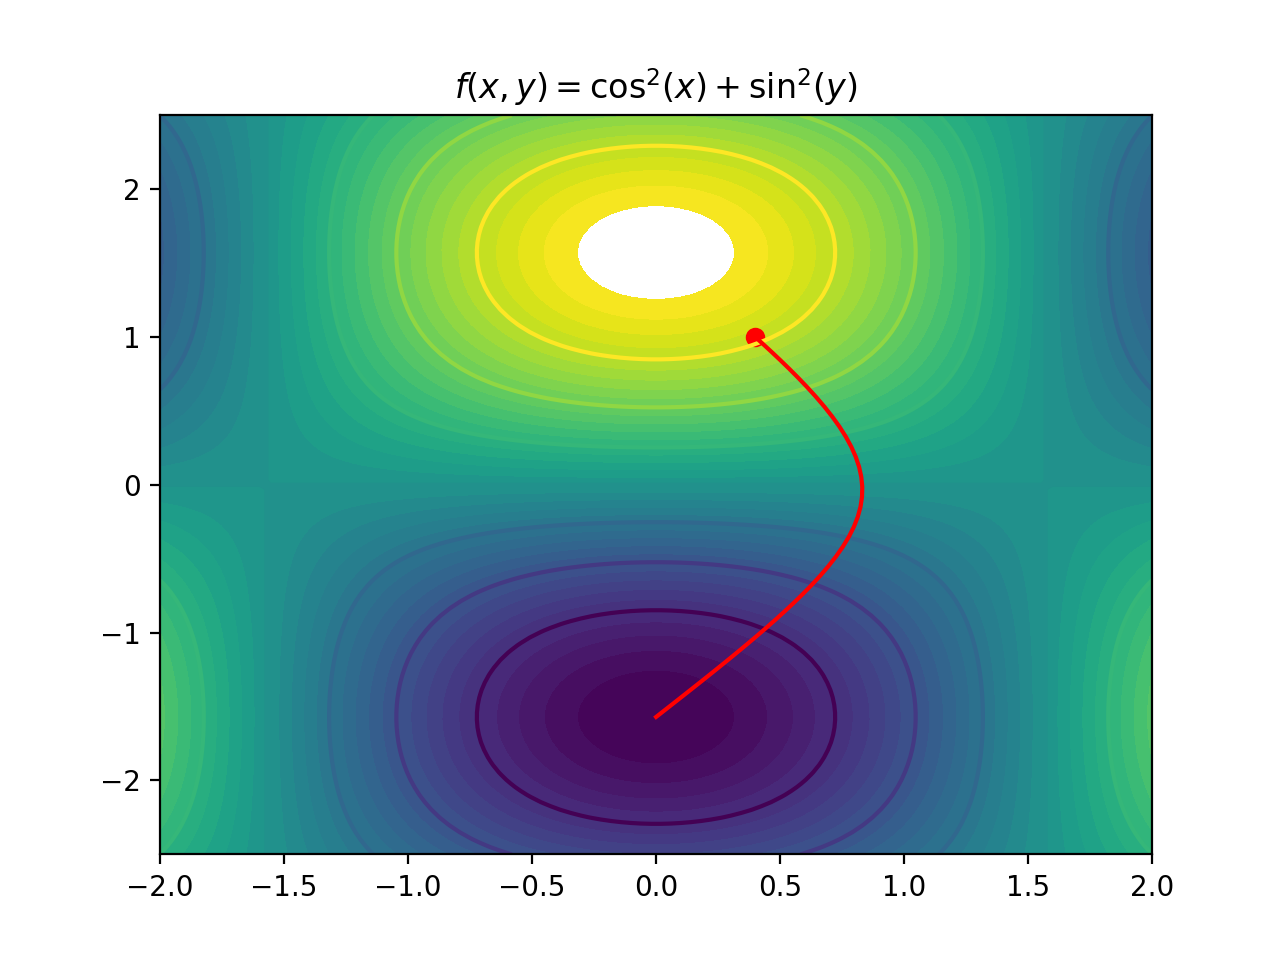

In [145]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2.5, 2.5, 100)
x, y = np.meshgrid(x, y)

x0 = np.array([0.4, 1])
f2 = lambda x, y: cos(x) * sin(y)
f2_grad = lambda x, y: np.array([-sin(x) * sin(y), cos(x) * cos(y)])
f2_path = grad_desc(x0, f2_grad)

cs = plt.contourf(x, y, f2(x, y), levels=np.arange(-1,1,0.05))
plt.contour(x, y, f2(x, y), c="k")
plt.scatter(*x0, c="red")
plt.plot(f2_path[:,0], f2_path[:,1], c="red")
plt.title(r"$f(x,y) = \cos^2(x) + \sin^2(y)$")